In [89]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

# auto_ts (auto_ml) only for Dhaka city

In [90]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [91]:
import pandas as pd

file_path = "C:\\Users\\Acer\\Downloads\\paper\\fahim_vai\\Dhaka.csv"

try:
  df = pd.read_csv(file_path)
  df.head()
except FileNotFoundError:
  print(f"File not found at: {file_path}")

In [92]:
df.head()

,Date,City,AQI,Responsible Pollutant,AQI Category,Comments
0,2023-02-13,Dhaka,152,PM2.5,UNHEALTHY,NaN
1,2023-02-14,Dhaka,178,PM2.5,UNHEALTHY,Range:161-194
2,2023-02-15,Dhaka,189,PM2.5,UNHEALTHY,Range: 178-200
3,2023-02-19,Dhaka,277,PM2.5,VERY UNHEALTHY,NaN
4,2023-02-20,Dhaka,246,PM2.5,VERY UNHEALTHY,NaN


In [93]:
df = df[['Date', 'AQI']]

In [94]:
# Ensure the data is sorted by date (replace 'Date' with your actual date column name)
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime if necessary
df = df.sort_values(by='Date').reset_index(drop=True)
df.head()

,Date,AQI
0,2023-02-13,152
1,2023-02-14,178
2,2023-02-15,189
3,2023-02-19,277
4,2023-02-20,246


In [95]:
# Split the data into training and testing sets
test = df.iloc[-60:]  # Latest 60 days
train = df.iloc[:-60]  # All rows except the last 60 days

In [96]:
test.head()

,Date,AQI
503,2024-09-20,151
504,2024-09-21,97
505,2024-09-22,108
506,2024-09-23,162
507,2024-09-24,101


In [97]:
train.head()

,Date,AQI
0,2023-02-13,152
1,2023-02-14,178
2,2023-02-15,189
3,2023-02-19,277
4,2023-02-20,246


In [98]:
train.set_index("Date", inplace=True)
test.set_index("Date", inplace=True)

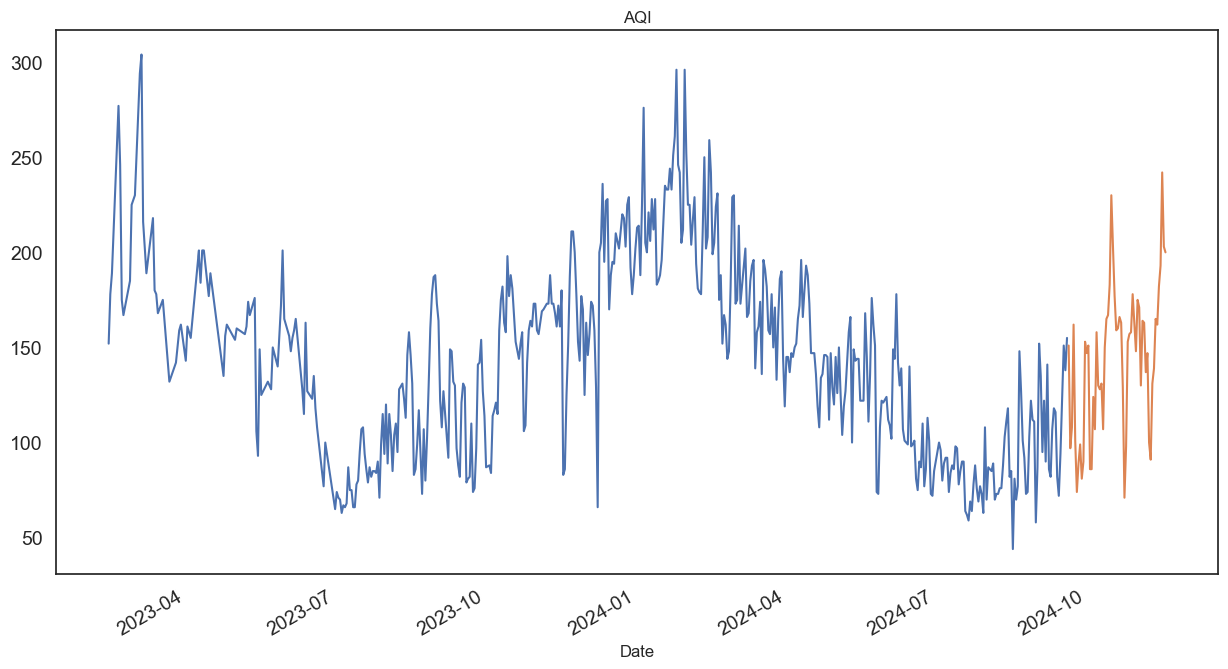

In [99]:
train.AQI.plot(figsize=(15,8), title= 'AQI', fontsize=14)
test.AQI.plot(figsize=(15,8), title= 'AQI', fontsize=14)
plt.show()

In [100]:
from auto_ts import auto_timeseries

In [101]:
model = auto_timeseries(forecast_period=60,
                        score_type='rmse', time_interval='D',
                        model_type='best')

In [102]:
train.reset_index(inplace=True)

Start of Fit.....
    Target variable given as = AQI
Start of loading of data.....
    Inputs: ts_column = Date, sep = ,, target = ['AQI']
    Using given input: pandas dataframe...
    Date column exists in given train data...
    train data shape = (503, 1)
Alert: Could not detect strf_time_format of Date. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is already stationary
There is no differencing needed in this datasets for VAR model
    No time series plot since verbose = 0. Continuing
Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
kwargs for Prophet model: {'iter': 100}
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

00:51:15 - cmdstanpy - INFO - Chain [1] start processing
00:51:15 - cmdstanpy - INFO - Chain [1] done processing
00:51:15 - cmdstanpy - INFO - Chain [1] start processing
00:51:15 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 35.98
    Std Deviation of actuals = 35.84
    Normalized RMSE (as pct of std dev) = 100%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 263 Test Shape: 60
Exception occurred while building Prophet model...
'DataFrame' object has no attribute 'append'
    FB Prophet may not be installed or Model is not running...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1869.443, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1869.228, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1868.244, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1867.483, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1856.553, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1858.255, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1858.242, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1863.418, Time=0.14 sec
 ARIMA(2,1,0)(0,0

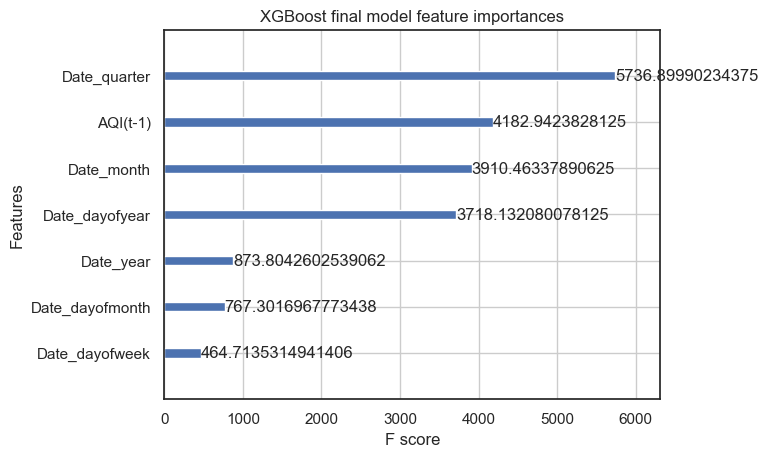

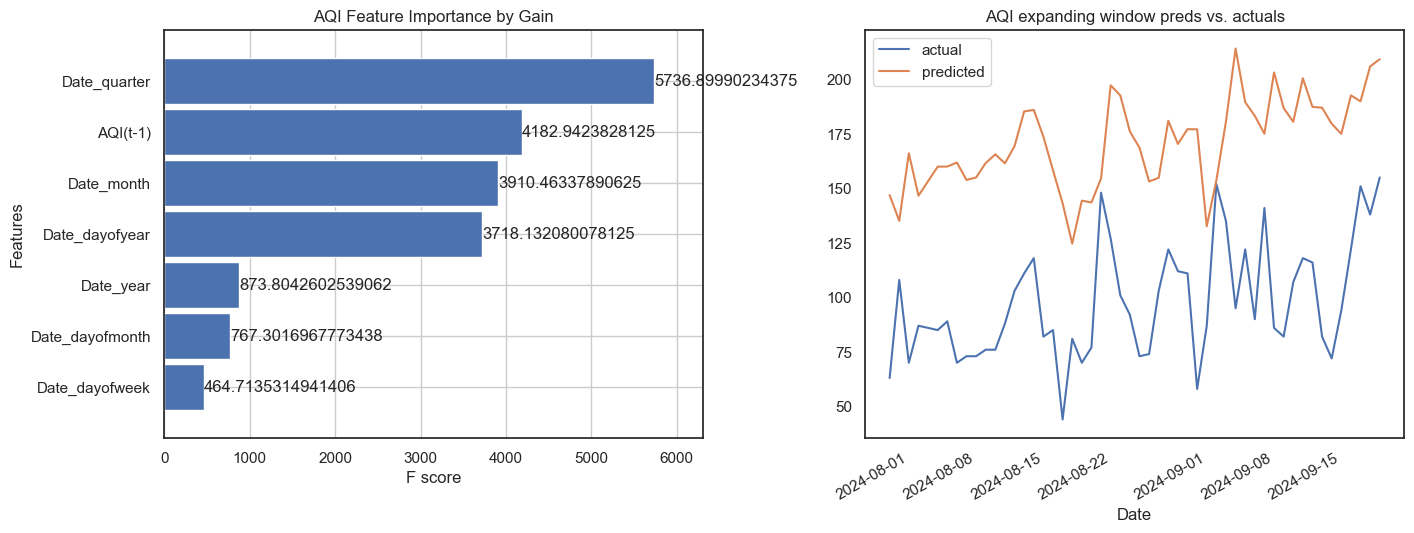

In [103]:
model.fit(traindata= train, 
          ts_column="Date",
          target="AQI")

In [106]:
import pandas as pd
import numpy as np

# Assuming train is your existing DataFrame.
# Ensure the index of train is a DatetimeIndex
if not isinstance(train.index, pd.DatetimeIndex):
    train['Date'] = pd.to_datetime(train['Date'])  # assuming there's a 'Date' column
    train.set_index('Date', inplace=True)

# Create a DataFrame with the necessary columns for prediction
future_data = pd.DataFrame({
    'Date': pd.date_range(start=train.index[-1] + pd.Timedelta(days=1), periods=60, freq='D')
})

# Add lagged variables with respect to AQI
future_data['AQI(t-1)'] = train['AQI'].iloc[-1]  # Last known AQI

# Populate the lagged AQI variables
for lag in range(1, 3):  # Create lagged features up to t-2
    future_data[f'AQI(t-{lag})'] = np.nan  # Placeholder for previous AQI lags

# Set the lagged values based on the last known AQI values
for i in range(len(future_data)):
    for lag in range(1, 3):
        if i >= lag:
            future_data[f'AQI(t-{lag})'].iloc[i] = train['AQI'].iloc[-lag]

# Set the index to Date
future_data.set_index('Date', inplace=True)

# Generate time-derived features
future_data['Year'] = future_data.index.year
future_data['Month'] = future_data.index.month
future_data['Day'] = future_data.index.day
future_data['Day_of_Week'] = future_data.index.dayofweek  # Monday=0, Sunday=6
future_data['Is_Weekend'] = (future_data['Day_of_Week'] >= 5).astype(int)  # Binary variable (1 if weekend)

# Now future_data is ready for prediction
# Ensure we keep only the relevant features for prediction
future_data = future_data[['AQI(t-1)', 'AQI(t-2)', 'Year', 'Month', 'Day', 'Day_of_Week', 'Is_Weekend']]

# Predictions
future_predictions = model.predict(testdata=future_data)

# Output predictions
print(future_predictions)


Predicting using test dataframe shape = (60, 7) for ML model
For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    Using given input: pandas dataframe...
    Alert: No strf_time_format given for Date. Provide strf_time format during "setup" for better results.
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date 

In [107]:
test.reset_index(inplace=True)

In [108]:
test["ML Predictions"] = future_predictions["yhat"].values

In [109]:
test.head()

,Date,AQI,ML Predictions
0,2024-09-20,151,122.048355
1,2024-09-21,97,95.621346
2,2024-09-22,108,96.292313
3,2024-09-23,162,98.320892
4,2024-09-24,101,100.648293


In [110]:
test.set_index("Date", inplace=True)

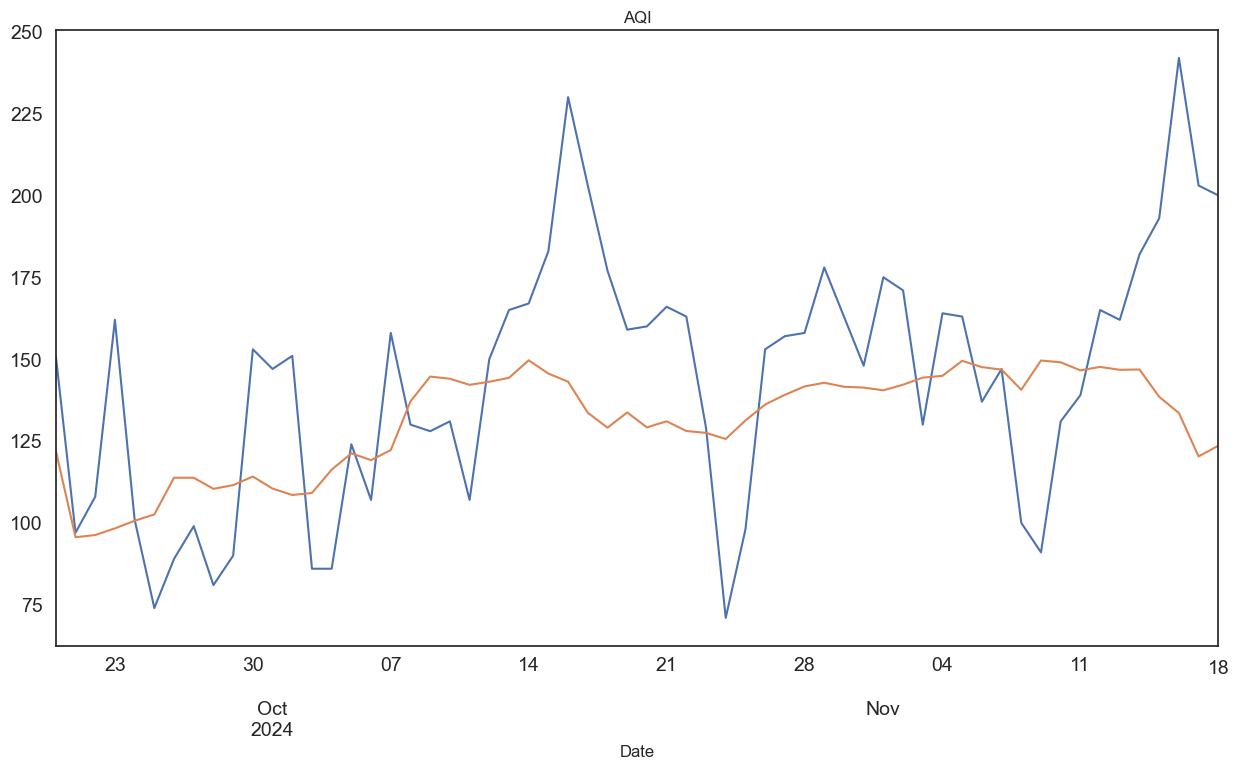

In [111]:
test["AQI"].plot(figsize=(15,8), title= 'AQI', fontsize=14)
test["ML Predictions"].plot(figsize=(15,8), title= 'AQI', fontsize=14)
plt.show()

# prophet

In [112]:
from prophet import Prophet

00:51:32 - cmdstanpy - INFO - Chain [1] start processing
00:51:32 - cmdstanpy - INFO - Chain [1] done processing


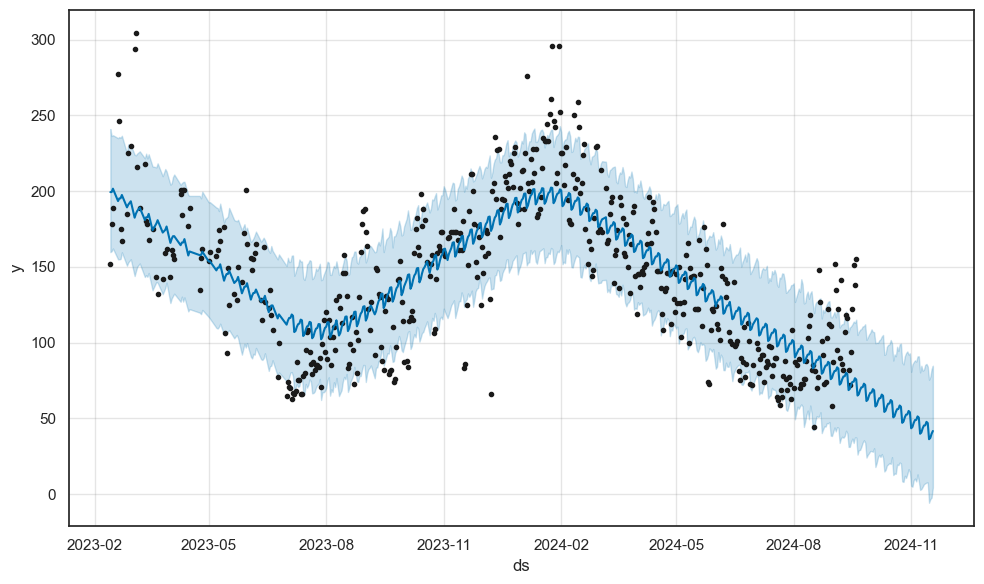

In [113]:
from prophet import Prophet

# Prepare the dataset for Prophet
train.reset_index(inplace=True)
train.columns = ['ds', 'y']  # Prophet requires specific column names

# Fit the model
prophet_model = Prophet()
prophet_model.fit(train)

# Forecast future AQI values
future = prophet_model.make_future_dataframe(periods=60)  # 60 days into the future
forecast = prophet_model.predict(future)
prophet_model.plot(forecast)
plt.show()


In [114]:
from pmdarima import auto_arima

# Fit the SARIMA model
sarima_model = auto_arima(train['y'], seasonal=True, m=7, trace=True)

# Make predictions
sarima_forecast = sarima_model.predict(n_periods=60)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=4616.962, Time=1.92 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=4685.774, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=4673.417, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=4661.187, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=4683.774, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=4614.943, Time=1.54 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=4613.129, Time=0.51 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=4614.944, Time=1.54 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=4612.404, Time=0.30 sec
 ARIMA(1,1,2)(1,0,0)[7] intercept   : AIC=4613.938, Time=0.55 sec
 ARIMA(1,1,2)(0,0,1)[7] intercept   : AIC=4613.921, Time=0.58 sec
 ARIMA(1,1,2)(1,0,1)[7] intercept   : AIC=4615.728, Time=1.05 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=4624.053, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=4611.804, Time=0.22 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept

In [115]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Example parameter grid
param_grid = {
    'n_estimators': [100, 250],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

xgb_model = XGBRegressor()
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(train.drop(columns='y'), train['y'])


ValueError: 
All the 80 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Acer\anaconda3\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Acer\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 1081, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Acer\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 596, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
                    ^^^^^^^^^^^^^^^
  File "C:\Users\Acer\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 1003, in _create_dmatrix
    return QuantileDMatrix(
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Acer\anaconda3\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Acer\anaconda3\Lib\site-packages\xgboost\core.py", line 1573, in __init__
    self._init(
  File "C:\Users\Acer\anaconda3\Lib\site-packages\xgboost\core.py", line 1632, in _init
    it.reraise()
  File "C:\Users\Acer\anaconda3\Lib\site-packages\xgboost\core.py", line 569, in reraise
    raise exc  # pylint: disable=raising-bad-type
    ^^^^^^^^^
  File "C:\Users\Acer\anaconda3\Lib\site-packages\xgboost\core.py", line 550, in _handle_exception
    return fn()
           ^^^^
  File "C:\Users\Acer\anaconda3\Lib\site-packages\xgboost\core.py", line 637, in <lambda>
    return self._handle_exception(lambda: self.next(input_data), 0)
                                          ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Acer\anaconda3\Lib\site-packages\xgboost\data.py", line 1416, in next
    input_data(**self.kwargs)
  File "C:\Users\Acer\anaconda3\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Acer\anaconda3\Lib\site-packages\xgboost\core.py", line 617, in input_data
    new, cat_codes, feature_names, feature_types = _proxy_transform(
                                                   ^^^^^^^^^^^^^^^^^
  File "C:\Users\Acer\anaconda3\Lib\site-packages\xgboost\data.py", line 1459, in _proxy_transform
    df, feature_names, feature_types = _transform_pandas_df(
                                       ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Acer\anaconda3\Lib\site-packages\xgboost\data.py", line 603, in _transform_pandas_df
    pandas_check_dtypes(data, enable_categorical)
  File "C:\Users\Acer\anaconda3\Lib\site-packages\xgboost\data.py", line 569, in pandas_check_dtypes
    _invalid_dataframe_dtype(data)
  File "C:\Users\Acer\anaconda3\Lib\site-packages\xgboost\data.py", line 356, in _invalid_dataframe_dtype
    raise ValueError(msg)
ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:ds: datetime64[ns]
